In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

# Load Data

In [2]:
data = pd.read_csv("Country clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


# Plot Data

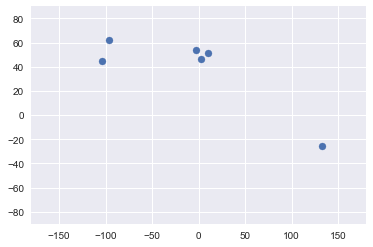

In [3]:
plt.scatter(data["Longitude"], data["Latitude"])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# Select Features

In [4]:
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


# Clustering

In [5]:
kmeans = KMeans(3)

In [6]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Clustering Results

In [7]:
identified_cluster = kmeans.fit_predict(x)
identified_cluster

array([2, 2, 1, 1, 1, 0], dtype=int32)

In [8]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_cluster
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


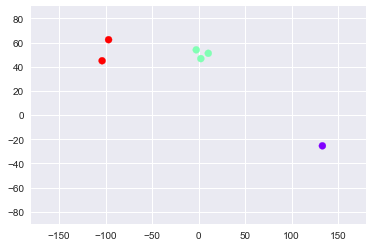

In [9]:
plt.scatter(data["Longitude"], data["Latitude"], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# Map data (Language)

In [10]:
data_mapped = data.copy()
data_mapped["Language"] = data_mapped["Language"].map({"English": 0, "French":1, "German":2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


# Select Features for clustering

In [11]:
x = data_mapped.iloc[:,3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [12]:
kmeans = KMeans(3)

In [13]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Clustering Results

In [14]:
identified_cluster = kmeans.fit_predict(x)
identified_cluster

array([1, 1, 2, 1, 0, 1], dtype=int32)

In [15]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_cluster
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


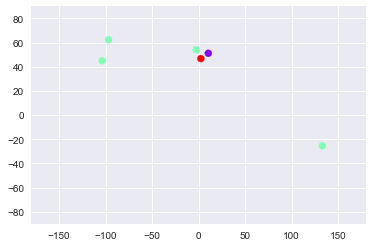

In [16]:
plt.scatter(data["Longitude"], data["Latitude"], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# Select Features for clustering

In [17]:
# Select Features for clustering

In [18]:
x = data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [19]:
kmeans = KMeans(3)

In [20]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Clustering Results

In [21]:
identified_cluster = kmeans.fit_predict(x)
identified_cluster

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [22]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_cluster
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


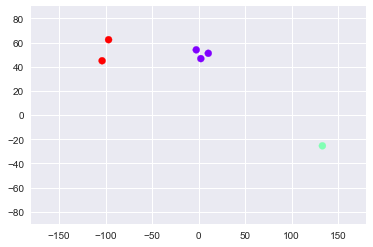

In [23]:
plt.scatter(data["Longitude"], data["Latitude"], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

Selecting the number of clusters

# WCSS

In [24]:
kmeans.inertia_

290.10523333333333

In [25]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [26]:
wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

# The Elbow Method

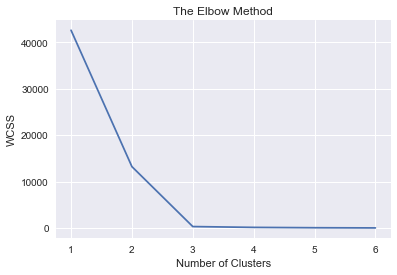

In [27]:
number_cluster = range(1,7)
plt.plot(number_cluster, wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()